In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import meteostat
import datetime as dt

In [2]:
transcriptome = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv",
    index_col=0,
)
rows_to_drop_expression_data = [
    "A2450525897_n01_undetermined",
    "A2449446903_n01_undetermined",
    "B250508004_n01_undetermined",
    "B2449500127_n01_undetermined",
]
transcriptome = transcriptome.drop(index=rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()

metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B250508004_n01_LICRNA03_A08",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",
]
borderline_unusable = [
    "A2450525897_n01_LICRNA01_F03",
    "A2450525897_n01_LICRNA01_G07",
    "A2449446903_n01_LICRNA02_A04",
    "A2449446903_n01_LICRNA02_H10",
    "B250508004_n01_LICRNA03_H02",
    "B250508004_n01_LICRNA03_H10",
    "B2449500127_n01_LICRNA04_H02",
    "B2449500127_n01_LICRNA04_H11",
]

all_unsable = borderline_unusable + unusable_samples

trimmed_transcriptome = transcriptome.drop(index=all_unsable)
trimmed_metadata = metadata.drop(index=all_unsable)
trimmed_metadata = trimmed_metadata.sort_index()
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=0)
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=1)

In [3]:
trimmed_transcriptome

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,0.0,3.731527,3.602189,0.0,0.0,31.063543,0.0,3.966935,...,17.950907,44.209074,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,0.0,1.501594,3.439569,0.0,0.0,22.712417,0.0,18.186693,...,1.986484,9.688606,0.0,5.501032,0.0,0.0,0.519342,0.0,0.000000,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.0,0.301733,2.700528,0.0,0.0,42.431625,0.0,12.937632,...,7.983340,16.384320,0.0,7.983340,0.0,0.0,0.166972,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,0.0,1.947758,3.742586,0.0,0.0,26.541337,0.0,23.861601,...,17.178143,17.005325,0.0,0.000000,0.0,0.0,0.628742,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,0.0,6.130092,4.215597,0.0,0.0,19.379509,0.0,5.006570,...,16.219201,43.599301,0.0,0.000000,0.0,0.0,1.074213,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H07,2.166065,9.568129,0.0,2.452473,5.370183,0.0,0.0,40.625757,0.0,24.878971,...,5.642466,3.542152,0.0,9.114753,0.0,0.0,0.206522,0.0,0.000000,0.984867
B250508004_n01_LICRNA03_H08,0.074367,4.474710,0.0,1.383813,2.059206,0.0,0.0,27.907884,0.0,11.118408,...,3.486989,4.209645,0.0,1.072920,0.0,0.0,0.948096,0.0,0.000000,0.760798
B250508004_n01_LICRNA03_H09,2.232353,6.249002,0.0,1.873955,3.869254,0.0,0.0,40.686812,0.0,7.391606,...,9.640892,4.655562,0.0,5.085306,0.0,0.0,0.360071,0.0,1.758217,4.807925
B250508004_n01_LICRNA03_H11,0.678594,7.655887,0.0,0.901942,4.195848,0.0,0.0,54.077818,0.0,0.334834,...,0.000000,2.304762,0.0,0.000000,0.0,0.0,0.166371,0.0,0.000000,0.694222


In [36]:
trimmed_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2449446903_n01_LICRNA02_A01,A01,LIC157,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,758284.0,82176.0,A,1,1246970.0,Long Term,January,83,2024-01-23 08:00:00
A2449446903_n01_LICRNA02_A02,A02,LIC169,plant,t15,1/27/24,8:00,LIC_02,LICRNA_02,3071877.0,353549.0,A,2,4985602.0,Long Term,January,87,2024-01-27 08:00:00
A2449446903_n01_LICRNA02_A03,A03,LIC193,plant,t17,2/2/24,8:00,LIC_03,LICRNA_02,1213638.0,158864.0,A,3,2465662.0,Long Term,February,93,2024-02-02 08:00:00
A2449446903_n01_LICRNA02_A05,A05,LIC217,plant,t19,2/9/24,8:00,LIC_03,LICRNA_02,1303436.0,90929.0,A,5,1515395.0,Long Term,February,100,2024-02-09 08:00:00
A2449446903_n01_LICRNA02_A06,A06,LIC229,plant,t20,2/16/24,8:00,LIC_03,LICRNA_02,1591231.0,141665.0,A,6,1924391.0,Long Term,February,107,2024-02-16 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H07,H07,LIC416,plant,c1_t03,2/10/24,4:00,LICCIRC_01,LICRNA_03,1648497.0,255099.0,H,7,4134513.0,Circadian Experiment 1,February,101,2024-02-10 04:00:00
B250508004_n01_LICRNA03_H08,H08,LIC428,plant,c1_t04,2/10/24,8:00,LICCIRC_01,LICRNA_03,2552177.0,438552.0,H,8,5245242.0,Circadian Experiment 1,February,101,2024-02-10 08:00:00
B250508004_n01_LICRNA03_H09,H09,LIC440,plant,c1_t05,2/10/24,12:00,LICCIRC_01,LICRNA_03,4228242.0,493699.0,H,9,7715482.0,Circadian Experiment 1,February,101,2024-02-10 12:00:00


In [38]:
long_term_transcriptome = trimmed_transcriptome.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]
long_term_metadata = trimmed_metadata.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]

In [39]:
long_term_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2449446903_n01_LICRNA02_A01,A01,LIC157,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,758284.0,82176.0,A,1,1246970.0,Long Term,January,83,2024-01-23 08:00:00
A2449446903_n01_LICRNA02_A02,A02,LIC169,plant,t15,1/27/24,8:00,LIC_02,LICRNA_02,3071877.0,353549.0,A,2,4985602.0,Long Term,January,87,2024-01-27 08:00:00
A2449446903_n01_LICRNA02_A03,A03,LIC193,plant,t17,2/2/24,8:00,LIC_03,LICRNA_02,1213638.0,158864.0,A,3,2465662.0,Long Term,February,93,2024-02-02 08:00:00
A2449446903_n01_LICRNA02_A05,A05,LIC217,plant,t19,2/9/24,8:00,LIC_03,LICRNA_02,1303436.0,90929.0,A,5,1515395.0,Long Term,February,100,2024-02-09 08:00:00
A2449446903_n01_LICRNA02_A06,A06,LIC229,plant,t20,2/16/24,8:00,LIC_03,LICRNA_02,1591231.0,141665.0,A,6,1924391.0,Long Term,February,107,2024-02-16 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G03,G03,LIC355,plant,t16,1/30/24,8:00,LIC_04,LICRNA_03,1609116.0,165214.0,G,3,3627980.0,Long Term,January,90,2024-01-30 08:00:00
B250508004_n01_LICRNA03_G04,G04,LIC367,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,1477644.0,189073.0,G,4,2732871.0,Long Term,December,34,2023-12-05 08:00:00
B250508004_n01_LICRNA03_H01,H01,LIC332,plant,t28,3/14/24,8:00,LIC_04,LICRNA_03,5963067.0,589822.0,H,1,9338754.0,Long Term,March,134,2024-03-14 08:00:00


In [40]:
## Check what a reasonable number of PCA components to keep is.
pca_model_10k_components = sklearn.decomposition.PCA(n_components=213)

tenk_components_results = pca_model_10k_components.fit_transform(
    long_term_transcriptome
)

missing_one_component = tenk_components_results[:, 1:]

In [41]:
inversed_on_max_components = pca_model_10k_components.inverse_transform(
    tenk_components_results
)
inversed_on_max_components

array([[ 3.82839245e-01,  1.19291831e+01,  1.52490173e-12, ...,
         0.00000000e+00,  1.36002321e-15,  6.26649838e+00],
       [-3.72613052e-12,  5.82668234e+00,  1.51765406e-12, ...,
         0.00000000e+00,  3.42781359e-15,  3.46731741e+00],
       [ 1.02156487e+00,  7.68352034e+00,  1.20464402e-13, ...,
         0.00000000e+00,  2.08166817e-15, -2.22044605e-15],
       ...,
       [ 1.36517155e+00,  7.17123002e+00,  3.71746037e-12, ...,
         0.00000000e+00,  9.57567359e-16,  4.44846742e+00],
       [ 3.65826977e-01,  4.91339861e+00,  2.27004179e-12, ...,
         0.00000000e+00,  9.99200722e-16,  4.86527708e+00],
       [-6.83408885e-12,  3.98611507e+00,  4.26459562e-12, ...,
         0.00000000e+00, -3.55271368e-15,  7.85227181e+00]],
      shape=(213, 38287))

In [43]:
recompiled_df = pd.DataFrame(
    data=inversed_on_max_components,
    index=long_term_transcriptome.index,
    columns=long_term_transcriptome.columns,
)
recompiled_df

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2449446903_n01_LICRNA02_A01,3.828392e-01,11.929183,1.524902e-12,3.731527,3.602189,-3.556797e-12,3.467948e-12,31.063543,4.842899e-13,3.966935,...,1.795091e+01,44.209074,-2.042810e-14,6.261658e-14,8.456777e-17,0.0,-9.992007e-16,0.0,1.360023e-15,6.266498e+00
A2449446903_n01_LICRNA02_A02,-3.726131e-12,5.826682,1.517654e-12,1.501594,3.439569,-3.537241e-12,3.390066e-12,22.712417,4.816271e-13,18.186693,...,1.986484e+00,9.688606,5.595524e-14,5.501032e+00,3.903128e-18,0.0,5.193422e-01,0.0,3.427814e-15,3.467317e+00
A2449446903_n01_LICRNA02_A03,1.021565e+00,7.683520,1.204644e-13,0.301733,2.700528,-3.551105e-12,3.414491e-12,42.431625,4.835149e-13,12.937632,...,7.983340e+00,16.384320,-2.309264e-14,7.983340e+00,1.366095e-16,0.0,1.669718e-01,0.0,2.081668e-15,-2.220446e-15
A2449446903_n01_LICRNA02_A05,7.327170e-01,3.149144,1.109355e-11,1.947758,3.742586,-3.558705e-12,3.428702e-12,26.541337,4.845497e-13,23.861601,...,1.717814e+01,17.005325,-6.838974e-14,3.108624e-15,-1.374768e-16,0.0,6.287425e-01,0.0,1.887379e-15,3.996803e-14
A2449446903_n01_LICRNA02_A06,1.614233e+00,1.238895,7.069052e-12,6.130092,4.215597,-3.557671e-12,3.372302e-12,19.379509,4.844089e-13,5.006570,...,1.621920e+01,43.599301,1.776357e-15,-3.330669e-14,-2.038300e-17,0.0,1.074213e+00,0.0,5.301315e-15,1.065814e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G03,1.114915e+00,8.385634,1.234290e-12,1.852338,4.720675,-4.306717e-12,2.160716e-12,30.289309,2.934761e-12,11.415082,...,1.705303e-13,14.357796,-4.440892e-15,2.513322e+00,9.844556e-17,0.0,9.908732e-01,0.0,2.650657e-15,2.281183e+00
B250508004_n01_LICRNA03_G04,4.964056e-01,8.356214,5.909561e-13,3.372257,3.069350,-3.491721e-12,2.713385e-12,60.177712,3.076656e-12,23.758980,...,3.879318e+00,10.115887,3.730349e-14,1.014591e+01,6.505213e-17,0.0,3.651123e-01,0.0,3.108624e-15,4.401263e+00
B250508004_n01_LICRNA03_H01,1.365172e+00,7.171230,3.717460e-12,1.926502,3.574878,-7.187990e-12,-1.671496e-12,53.113875,-7.014856e-12,40.291678,...,1.185396e+00,6.525640,1.659554e+01,4.923952e+00,-2.992398e-17,0.0,3.842852e-01,0.0,9.575674e-16,4.448467e+00
B250508004_n01_LICRNA03_H03,3.658270e-01,4.913399,2.270042e-12,0.972466,3.761743,-1.135103e-11,1.076395e-11,14.311528,-2.028234e-12,10.334051,...,4.288305e+00,7.558461,3.286260e-14,3.298696e-01,1.591609e-16,0.0,2.242251e-02,0.0,9.992007e-16,4.865277e+00


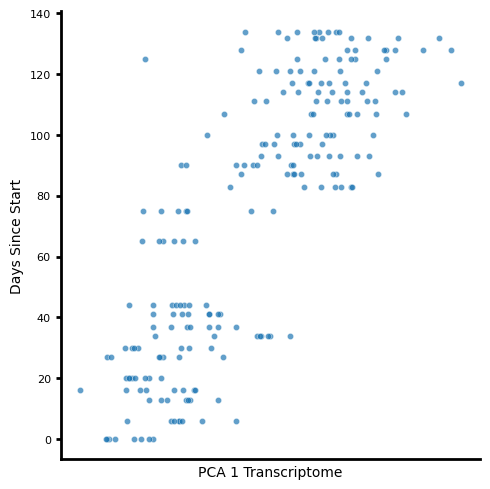

In [57]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=tenk_components_results[:, 0],
    y=long_term_metadata["daysincestart"],
    # hue=long_term_metadata["daysincestart"],
    s=20,
    alpha=0.7,
)
# ax2 = plt.twinx()
# sns.lineplot(
#     x=long_term_metadata_w_load_info['Sample Number'],
#     y=long_term_metadata_w_load_info['Scaled HAM16S'],
#     color = 'k'
# )
plt.xticks([])
# plt.yticks([])
plt.xlabel("PCA 1 Transcriptome", fontsize=10)
plt.ylabel("Days Since Start", fontsize=10)
sns.despine()
# ax.set_ylabel(ylabel = 'Normalized Gene Expression', fontsize = 14, color = 'k')
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)

ax.spines["top"].set_color("black")
ax.spines["top"].set_linewidth(0)

# ax2.spines["right"].set_color("black")
# ax2.spines["right"].set_linewidth(2)
# ax2.spines["top"].set_color("black")
# ax2.spines["top"].set_linewidth(0)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=0,
)  # rotation=90
plt.yticks(fontsize=8)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')
# plt.savefig('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Figs/6_interesting_genes_proteasome.pdf')

In [44]:
corr_results = trimmed_transcriptome.corrwith(recompiled_df, method="pearson")
print(f"Min equals {corr_results.min()}")
print(f"Max equals {corr_results.max()}")
print(f"Median equals {corr_results.median()}")

Min equals 0.9999999999999992
Max equals 1.000000000000001
Median equals 1.0


In [61]:
start_time = dt.datetime(2023, 10, 1)
end_time = dt.datetime(2024, 4, 30)
luke_apt_point = meteostat.Point(40.73005, -73.99450)
luke_hourly_data = meteostat.Daily(luke_apt_point, start_time, end_time).fetch()

In [62]:
luke_hourly_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-10-01,20.8,16.1,27.2,0.0,0.0,<NA>,6.3,<NA>,1021.7,<NA>
2023-10-02,21.6,18.9,26.7,0.0,0.0,<NA>,7.7,<NA>,1022.1,<NA>
2023-10-03,21.6,17.2,27.8,0.0,0.0,<NA>,5.7,<NA>,1021.7,<NA>
2023-10-04,22.3,18.9,28.3,0.0,0.0,<NA>,7.3,<NA>,1022.3,<NA>
2023-10-05,20.6,17.2,24.4,0.0,0.0,<NA>,6.9,<NA>,1023.3,<NA>
...,...,...,...,...,...,...,...,...,...,...
2024-04-26,10.2,6.7,14.4,0.0,0.0,<NA>,10.8,<NA>,1031.6,<NA>
2024-04-27,10.8,7.8,15.0,0.0,0.0,<NA>,11.7,<NA>,1032.4,<NA>
2024-04-28,15.5,10.0,23.9,0.9,0.0,<NA>,4.8,<NA>,1021.6,<NA>


In [69]:
luke_hourly_data.index[0]

Timestamp('2023-10-01 00:00:00')

In [73]:
for dateandtime in long_term_metadata["Date and Time"]:
    pd_formatted_date = pd.to_datetime(dateandtime.date())
    current_avg_daily_temp = luke_hourly_data.loc[pd_formatted_date]["tavg"]
    print(current_avg_daily_temp)

2.7
6.7
5.0
7.5
4.5
1.2
6.6
6.0
6.7
8.1
11.9
2.7
6.7
5.0
2.8
7.5
4.5
1.2
6.6
6.0
6.7
8.1
11.9
2.7
6.7
5.0
2.8
7.5
4.5
1.2
6.6
6.0
6.7
8.1
11.9
2.7
6.7
5.0
2.8
7.5
4.5
1.2
6.6
6.0
6.7
8.1
11.9
2.7
6.7
5.0
2.8
7.5
4.5
1.2
6.6
6.0
6.7
8.1
11.9
6.7
5.0
2.8
7.5
4.5
1.2
6.6
6.0
6.7
8.1
11.9
2.7
6.7
5.0
2.8
7.5
4.5
1.2
6.6
6.0
6.7
8.1
11.9
2.7
6.7
5.0
2.8
7.5
4.5
1.2
6.6
6.0
8.1
11.9
9.3
14.8
9.6
14.8
6.6
7.1
5.1
7.9
0.9
-2.6
9.3
14.8
9.6
14.8
6.6
2.9
7.1
6.9
5.1
7.9
0.9
-2.6
9.3
14.8
9.6
14.8
6.6
2.9
7.1
6.9
5.1
7.9
-2.6
9.3
14.8
9.6
14.8
6.6
2.9
7.1
6.9
5.1
7.9
9.3
14.8
9.6
14.8
6.6
2.9
7.1
6.9
5.1
7.9
0.9
-2.6
9.3
14.8
14.8
6.6
2.9
7.1
6.9
5.1
7.9
0.9
-2.6
9.3
14.8
9.6
14.8
6.6
2.9
6.9
5.1
7.9
0.9
-2.6
9.3
14.8
9.6
14.8
6.6
2.9
7.1
6.9
5.1
7.9
0.9
-2.6
12.1
3.2
2.5
5.7
12.1
3.2
2.5
5.7
12.1
3.2
2.5
5.7
12.1
3.2
2.5
5.7
12.1
3.2
2.5
5.7
12.1
3.2
2.5
5.7
12.1
3.2
2.5
5.7
12.1
2.5
5.7


In [70]:
luke_hourly_data.loc[pd.to_datetime(metadata["Date and Time"].iloc[0].date())]

tavg       9.3
tmin       6.1
tmax      12.8
prcp       1.9
snow       0.0
wdir      <NA>
wspd       8.6
wpgt      <NA>
pres    1018.0
tsun      <NA>
Name: 2023-11-01 00:00:00, dtype: Float64

In [ ]:
luk

In [67]:
metadata["Date and Time"].iloc[0].date()

datetime.date(2023, 11, 1)